In [1]:
!pip install pyshp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import seaborn as sb
from urllib.request import urlopen
from bs4 import BeautifulSoup as bsoup
%matplotlib inline

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Goal of analysis:

We are aiming to get an overview of AirBnb listings in New York City 2019, with the aim of providing improvement suggestions and stragies for AirBnb going forward. It is key that when making suggestions we look at issues at ALL ANGLES. 

### Let's first do some initial exploratory analysis

In [2]:
# Read in data, 
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Show all features
data.columns.values


array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [4]:
# number of unique hosts
print("Number of unique hosts:", len(data["host_id"].unique()))

# Number of listings total
print("Number of listings total:", len(data))

# Number of features
print("Number of features:", len(data.columns.values))


Number of unique hosts: 37457
Number of listings total: 48895
Number of features: 16


['Private room' 'Entire home/apt' 'Shared room']


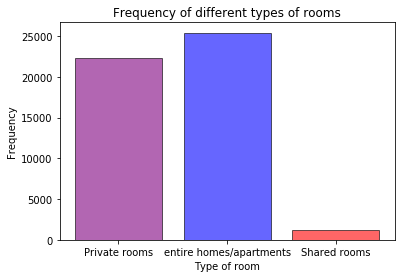

In [5]:
# Plot distribution of listing prices by the type of room it is

# Get unique types of rooms 
print(data["room_type"].unique())

x1 = data.loc[data.room_type=="Private room", "price"]
x2 = data.loc[data.room_type=="Entire home/apt", "price"]
x3 = data.loc[data.room_type=="Shared room", "price"]

# Bar plot of the frequency counts
plt.bar(x=["Private rooms", "entire homes/apartments", "Shared rooms"], height=[len(x1), len(x2), len(x3)], color=["purple", "blue", "red"] , edgecolor="black", alpha=0.6)
plt.title("Frequency of different types of rooms")
plt.xlabel("Type of room")
plt.ylabel("Frequency")
plt.show()


#### Counts of the different types of rooms

So, we can see that the dataset is dominated with Private rooms and entire homes listings. This essentially shows that owners of these listings are seeing that there is more success inr rooms with more privacy (not surprising!)

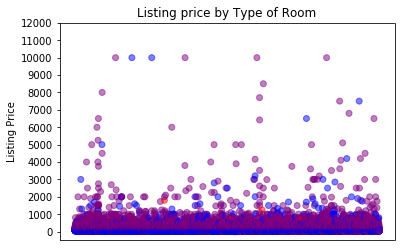

In [6]:
# Map type of listing to colors
dict_cols = {"Private room": "blue", "Entire home/apt": "purple", "Shared room": "red"}
col_list = [dict_cols[type_room] for type_room in data["room_type"]]

# Scatter plot showing distribution of price in relation to type of room
plt.scatter([i for i in range(len(data))], data["price"], c=col_list, alpha=0.5)
plt.title("Listing price by Type of Room")
plt.yticks([i for i in range(0, 13000, 1000)])
plt.xticks([])
plt.ylabel("Listing Price")
plt.show()

### Let's identify some neighoburhood group patterns


['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


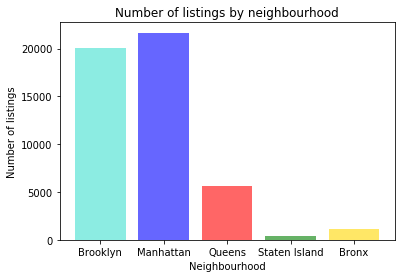

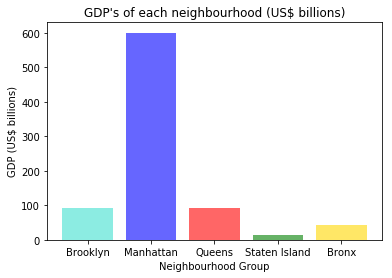

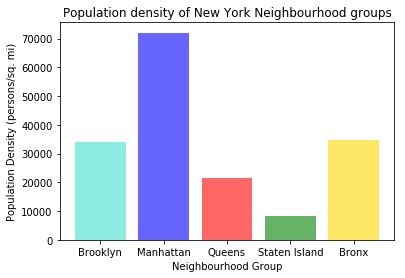

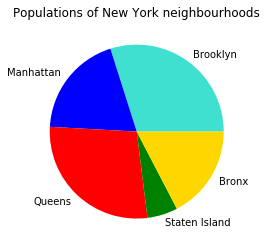

In [7]:
# Lets see with neighoburhood group now
unique_neighbourhoods = list(data["neighbourhood_group"].unique())
print(unique_neighbourhoods)

# assign colors for plotting
dict_col = {"Brooklyn": "turquoise", "Queens": "red", "Staten Island": "green", "Bronx": "gold", "Manhattan": "blue"}
col_list = [dict_col[neighbourhood] for neighbourhood in data["neighbourhood_group"]]
color_list = ["turquoise", "blue", "red", "green", "gold"]

list_ng = list(data["neighbourhood_group"])

list_counts = [list_ng.count("Brooklyn"), list_ng.count("Manhattan"), list_ng.count("Queens"), list_ng.count("Staten Island"),
    list_ng.count("Bronx")]

# Plot frequency counts
plt.bar(x=unique_neighbourhoods, height=list_counts, color=color_list, alpha=0.6)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of listings")
plt.title("Number of listings by neighbourhood")
plt.show()


# PLot showing gdp's of each burough 
gdps = [91.559, 600.244, 93.310, 14.514, 42.695]
plt.bar(x=unique_neighbourhoods, height=gdps, color=color_list, alpha=0.6)
plt.title("GDP's of each neighbourhood (US$ billions)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("GDP (US$ billions)")
plt.show()

# Plot showing population density (persons / squaremile)
pkmsq = [34137, 72033, 21460, 8112, 34653]
plt.bar(x=unique_neighbourhoods, height=pkmsq, color=color_list, alpha=0.6)
plt.title("Population density of New York Neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Population Density (persons/sq. mi)")
plt.show()

# Pie chart showing populations (gathered 10/12/2019)
populations = [2533000, 1629000, 2359000, 479458, 1471000]
plt.pie(populations, labels=unique_neighbourhoods, colors=color_list)
plt.title("Populations of New York neighbourhoods")
plt.show()


### Summary of plots and Business Strategy

One thing in particular is noticeable from the first figure(top): it is that the Number of listings for Manhattan and Brooklyn are far higher than those of Bronx and Queens (and of course Staten Island). 

Remember GDP is a measure of how the total value of final goods and services produced within a countries (or neighbourhood in our case) borders. We can use this as a measure of the "general wealth" of the area. We see that Manhattan is FAR superior in terms of their GDP, with Brooklyn far behind in second. Interestingly the GDP of Brooklyn and Queens are very similar whilst the number of listings differ quite a bit. We can link this to population density being 1.5x more in Brooklyn, so if GDP is the same, more people = more listings. We also see that the population density of The Bronx is higher than that of Brooklyn but GDP of 2x that of The Bronx, even though populations are very similar. 

We can conclude that having a high population density in combination to a low GDP can lead to a low number of AirBnb listings. Why is this? Well, it is fair to say that tourists are the main market for airbnb hosts, and tourists generally would settle for "nicer" looking place, and nicer looking places tend to be in higher GDP areas. The question would be for The Bronx, and Queens is: would it be worth setting up an AirBnb?   

What we can take away from this, is that AirBnb should come up with a strategy that targets Queens, as it is a highly populated area, is close to Manhattan and has a decent GDP indicating the wealth of the area (and potential). The Bronx is known to have a high poverty rate (28%) so targeting this area may not be worth the costs.  
